# Data Functions

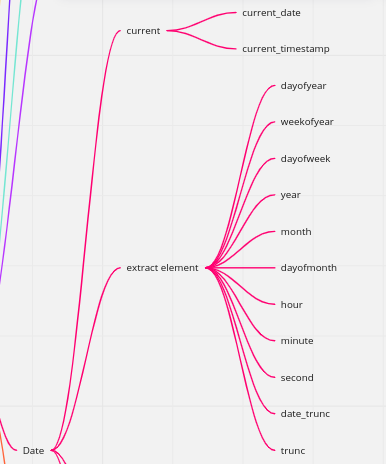
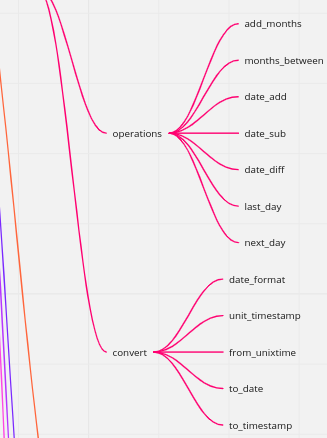

In [ ]:
import warnings
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

warnings.filterwarnings("ignore", category=FutureWarning)

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

In [ ]:
df = spark.range(1, 30).select(F.date_format(F.concat(F.lit(2023), F.lit('-'), F.lit(4), F.lit('-'), F.col("id")), "yyyy-MM-dd").alias("data"))
df.toPandas()

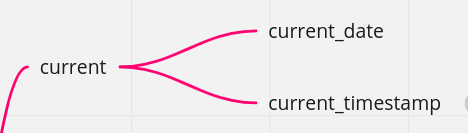

## [current_date](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.current_date.html)

pyspark.sql.functions.current_date() → pyspark.sql.column.Column

Returns the current date at the start of query evaluation as a DateType column. All calls of current_date within the same query return the same value.

In [ ]:
df = df.withColumn('today', F.current_date())
df.toPandas()

## [current_timestamp](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.current_timestamp.html)

pyspark.sql.functions.current_timestamp() → pyspark.sql.column.Column

Returns the current timestamp at the start of query evaluation as a TimestampType column. All calls of current_timestamp within the same query return the same value.

In [ ]:
df = df.withColumn('now', F.current_timestamp())
df.toPandas()

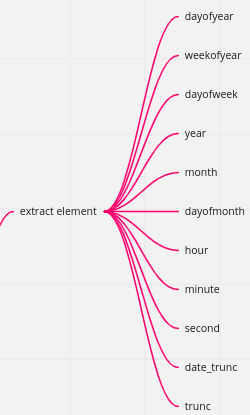

## [dayofyear](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.dayofyear.html)

pyspark.sql.functions.dayofyear(col: ColumnOrName) → pyspark.sql.column.Column

Extract the day of the year of a given date as integer.


## [weekofyear](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.weekofyear.html)

pyspark.sql.functions.weekofyear(col: ColumnOrName) → pyspark.sql.column.Column

Extract the week number of a given date as integer. A week is considered to start on a Monday and week 1 is the first week with more than 3 days, as defined by ISO 8601

## [dayofweek](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.dayofweek.html)

pyspark.sql.functions.dayofweek(col: ColumnOrName) → pyspark.sql.column.Column

Extract the day of the week of a given date as integer. Ranges from 1 for a Sunday through to 7 for a Saturday

## [year](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.year.html)

pyspark.sql.functions.year(col: ColumnOrName) → pyspark.sql.column.Column

Extract the year of a given date as integer.


## [month](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.month.html)

pyspark.sql.functions.month(col: ColumnOrName) → pyspark.sql.column.Column

Extract the month of a given date as integer.

## [dayofmonth](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.dayofmonth.html)

pyspark.sql.functions.dayofmonth(col: ColumnOrName) → pyspark.sql.column.Column

Extract the day of the month of a given date as integer.

## [hour](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.hour.html)

pyspark.sql.functions.hour(col: ColumnOrName) → pyspark.sql.column.Column

Extract the hours of a given date as integer.

## [minute](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.minute.html)

pyspark.sql.functions.minute(col: ColumnOrName) → pyspark.sql.column.Column

Extract the minutes of a given date as integer.

## [second](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.second.html)

pyspark.sql.functions.second(col: ColumnOrName) → pyspark.sql.column.Column

Extract the seconds of a given date as integer.

In [ ]:
df = (df.withColumn('dayofyear', F.dayofyear('data'))
        .withColumn('weekofyear', F.weekofyear('data'))
        .withColumn('dayofweek', F.dayofweek('data'))
        .withColumn('year', F.year('data'))
        .withColumn('month', F.month('data'))
        .withColumn('dayofmonth', F.dayofmonth('data'))
        .withColumn('hour', F.hour('now'))
        .withColumn('minute', F.minute('now'))
        .withColumn('second', F.second('now'))
     )
      
df.toPandas()

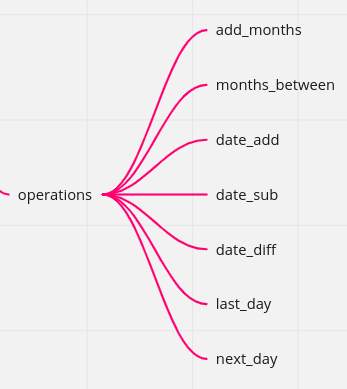

## [add_months](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.add_months.html)

pyspark.sql.functions.add_months(start: ColumnOrName, months: Union[ColumnOrName, int]) → pyspark.sql.column.Column[source]


Returns the date that is months months after start

## [months_between](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.months_between.html)

pyspark.sql.functions.months_between(date1: ColumnOrName, date2: ColumnOrName, roundOff: bool = True) → pyspark.sql.column.Columm

Returns number of months between dates date1 and date2. If date1 is later than date2, then the result is positive. A whole number is returned if both inputs have the same day of month or both are the last day of their respective months. Otherwise, the difference is calculated assuming 31 days per month. The result is rounded off to 8 digits unless roundOff is set to False.

## [date_add](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.date_add.html)

pyspark.sql.functions.date_add(start: ColumnOrName, days: Union[ColumnOrName, int]) → pyspark.sql.column.Column

Returns the date that is days days after start

## [date_sub](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.date_sub.html)

pyspark.sql.functions.date_sub(start: ColumnOrName, days: Union[ColumnOrName, int]) → pyspark.sql.column.Column

Returns the date that is days days before start

## [datediff](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.datediff.html)

pyspark.sql.functions.datediff(end: ColumnOrName, start: ColumnOrName) → pyspark.sql.column.Column

Returns the number of days from start to end.

## [last_day](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.last_day.html)

pyspark.sql.functions.last_day(date: ColumnOrName) → pyspark.sql.column.Column

Returns the last day of the month which the given date belongs to.

## [next_day](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.next_day.html)

pyspark.sql.functions.next_day(date: ColumnOrName, dayOfWeek: str) → pyspark.sql.column.Column

Returns the first date which is later than the value of the date column.

Day of the week parameter is case insensitive, and accepts:
“Mon”, “Tue”, “Wed”, “Thu”, “Fri”, “Sat”, “Sun”.

In [ ]:
df = df.drop('dayofyear', 'weekofyear', 'dayofmonth', 'dayofweek', 'year', 'month', 'hour', 'minute', 'second')

df = (df.withColumn('add_months', F.add_months('data', 2))
          .withColumn('months_between', F.months_between('data', 'today'))
          .withColumn('date_add', F.date_add('data', 10))
          .withColumn('date_sub', F.date_sub('data', 10))
          .withColumn('datediff', F.datediff('data', 'now'))
          .withColumn('last_day', F.last_day('data'))
          .withColumn('next_day', F.next_day('data', 'Sun'))
     )

df.toPandas()

## [date_trunc](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.date_trunc.html)

pyspark.sql.functions.date_trunc(format: str, timestamp: ColumnOrName) → pyspark.sql.column.Column

Returns timestamp truncated to the unit specified by the format.

In [ ]:
df = df.drop('add_months', 'months_between', 'date_add', 'date_sub', 'datediff', 'last_day', 'next_day')

df = (df.withColumn('date_trunc_year', F.date_trunc('year', F.col('now')))
        .withColumn('date_trunc_month', F.date_trunc('month', F.col('now')))
        .withColumn('date_trunc_day', F.date_trunc('day', F.col('now')))
        .withColumn('date_trunc_hour', F.date_trunc('hour', F.col('now')))
        .withColumn('date_trunc_minute', F.date_trunc('minute', F.col('now')))
        .withColumn('date_trunc_second', F.date_trunc('second', F.col('now')))
     )
df.toPandas()

## [trunc](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.trunc.html)

pyspark.sql.functions.trunc(date: ColumnOrName, format: str) → pyspark.sql.column.Column

Returns date truncated to the unit specified by the format.

In [ ]:
df = (df.withColumn('trunc_year', F.trunc(F.col('now'), 'year'))
        .withColumn('trunc_month', F.trunc(F.col('now'), 'month'))
        .withColumn('trunc_day', F.trunc(F.col('now'), 'day'))
     )

df.toPandas()

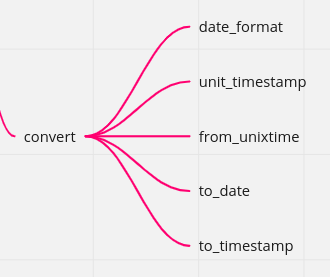

## [date_format](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.date_format.html)

pyspark.sql.functions.date_format(date: ColumnOrName, format: str) → pyspark.sql.column.Column

Converts a date/timestamp/string to a value of string in the format specified by the date format given by the second argument.

A pattern could be for instance dd.MM.yyyy and could return a string like ‘18.03.1993’. All pattern letters of datetime pattern. can be used.

## [unix_timestamp](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.unix_timestamp.html)

pyspark.sql.functions.unix_timestamp(timestamp: Optional[ColumnOrName] = None, format: str = 'yyyy-MM-dd HH:mm:ss') → pyspark.sql.column.Column

Convert time string with given pattern (‘yyyy-MM-dd HH:mm:ss’, by default) to Unix time stamp (in seconds), using the default timezone and the default locale, return null if fail.

if timestamp is None, then it returns current timestamp.

## [from_unixtime](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.from_unixtime.html)

pyspark.sql.functions.from_unixtime(timestamp: ColumnOrName, format: str = 'yyyy-MM-dd HH:mm:ss') → pyspark.sql.column.Column

Converts the number of seconds from unix epoch (1970-01-01 00:00:00 UTC) to a string representing the timestamp of that moment in the current system time zone in the given format.

In [ ]:
df = df.drop('date_trunc_year'
            ,'date_trunc_month'
            ,'date_trunc_day'
            ,'date_trunc_hour'
            ,'date_trunc_minute'
            ,'date_trunc_second'
            ,'date_trunc_month'
            ,'trunc_year'
            ,'trunc_month'
            ,'trunc_day')

df = (df.withColumn('date_format', F.date_format(F.col('data'), 'dd/MM/yyyy'))
        .withColumn('unix_timestamp', F.unix_timestamp(F.col('now'), 'yyyy-MM-dd HH:mm:ss'))
        .withColumn('from_unixtime', F.from_unixtime(F.col('unix_timestamp'), 'yyyy-MM-dd HH:mm:ss'))
        .withColumn('now_string', F.col('now').cast('string'))
     )

df.toPandas()

# [to_date](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.to_date.html)

pyspark.sql.functions.to_date(col: ColumnOrName, format: Optional[str] = None) → pyspark.sql.column.Column

Converts a Column into pyspark.sql.types.DateType using the optionally specified format. Specify formats according to datetime pattern. By default, it follows casting rules to pyspark.sql.types.DateType if the format is omitted. Equivalent to col.cast("date").

# [to_timestamp](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.to_timestamp.html)

pyspark.sql.functions.to_timestamp(col: ColumnOrName, format: Optional[str] = None) → pyspark.sql.column.Column

Converts a Column into pyspark.sql.types.TimestampType using the optionally specified format. Specify formats according to datetime pattern. By default, it follows casting rules to pyspark.sql.types.TimestampType if the format is omitted. Equivalent to col.cast("timestamp").

In [ ]:
df.printSchema()

In [ ]:
df = (df.withColumn('to_date', F.to_date(F.col('from_unixtime')))
        .withColumn('to_timestamp', F.to_timestamp(F.col('now_string')))
        .withColumn('cast_date', F.col('from_unixtime').cast('date'))
        .withColumn('cast_timestamp', F.col('now_string').cast('timestamp'))
     )

df.toPandas()

In [ ]:
df.printSchema()